# EDA(Algerian Forest Fires Dataset)

 **Rajesh Sekar**


    

**Linkedin:**https://lnkd.in/gu7QnXPV
  
**Github:** https://github.com/Rajeshsekar1504/EDA_Algerian_Data_Set
  

  
**EDA**

      1.Data Profiling
      2.Statistical Analysis
      3.Graphical Analysis

**Dataset:**https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++

### Importing all the required the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', 500)

### Importing dataset and cleaning data

In [2]:
df= pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.iloc[121:].head(4) #index 122,123 need to be removed from dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


### Dropping rows which have no information

In [3]:
df.drop(index=[122,123], inplace=True) # droping row 122,123 from dataset
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


### Creating Region feature

In [4]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
df.loc[:122,'Region']=0
df.loc[122:, 'Region']=1
df.iloc[120:].head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1.0
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,1.0


### Datatypes and describe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


### Describing the dataset

In [6]:
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244.000000
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,NaN
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,NaN
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501028
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


### Data Cleaning

In [7]:
# here it is visible that some columns have spaces in the names like RH, Ws
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

### stripping spaces from column names

In [8]:
df.columns = [col_name.strip() for col_name in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
### converting all feature values to string so that we can do data cleaning as shown below.
df=df.astype(str)

In [10]:
### Some values in columns also have space
for feature in ['Rain','FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[feature] = df[feature].str.replace(" ","")

In [11]:
## index no 165 for feature name FWI has value fire
df[df['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [12]:
### replacing fire value witha float value
df.loc[165,'FWI'] ='0.1'

In [13]:
### replacing nan value wit fire to make data equal to the info given in dataset
df[df['Classes']== 'nan'].index
df.loc[165,'Classes']='fire'

In [14]:
## encoding classes feature
df['Classes']=df['Classes'].str.replace('notfire','0')
df['Classes']=df['Classes'].str.replace('fire','1')

### Changing datatypes

In [15]:
### changing datatypes of features to numerical for numerical features as all are in object
datatype_convert={'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64', 'Ws':'int64','Rain':'float64',
'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64', 'FWI':'float64',
'Classes':'int64', 'Region':'float64'}
df=df.astype(datatype_convert)
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

### Info about dataset and its attributes

1. The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria
and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for each region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (class)
5. The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

### Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

# Weather data observations

1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
2. RH : Relative Humidity in %: 21 to 90
3. Ws :Wind speed in km/h: 6 to 29
4. Rain: total day in mm: 0 to 16.8

### FWI Components 

1. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
2. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
3. Drought Code (DC) index from the FWI system: 7 to 220.4
4. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
5. Buildup Index (BUI) index from the FWI system: 1.1 to 68
6. Fire Weather Index (FWI) Index: 0 to 31.1
7. Classes: two classes, namely fire and not fire

In [16]:
df.shape

(244, 15)

### Checking Null values

In [17]:
### checking for null values

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# Observation
1. There is no null value in dataset.
2. Total 244 rows and 15 columns is present.

# Numerical and continuous features

In [18]:
# categorical features

categorical_feature=[feature for feature in df.columns if df[feature].dtypes=='O']

#getting to know different categories in cateogrical features with its count.
for feature in categorical_feature:
    print(df.groupby(feature)['Region'].value_counts())
    


<AxesSubplot:xlabel='Classes', ylabel='count'>

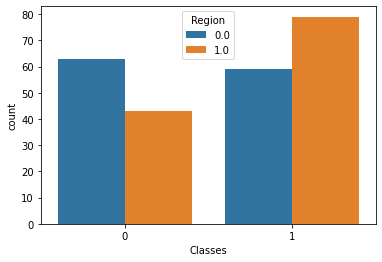

In [19]:
sns.countplot(data=df, x='Classes',hue='Region')

### Observation

1.It is evident that Sidi Bel-abbes region has more occurance of fire than Bejaia region.

### Numerical features

In [20]:
### Getting list of numerical features
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(numerical_features)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']


In [21]:
### Getting uniques values in each numerical features

df[numerical_features].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

### Seggregating discrete and continuous variables

### Discrete Numerical Features

In [22]:
#here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be
#considered continuous feature

discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<35]
discrete_features

['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region']

#### Discrete Numerical Feature vs Target Feature

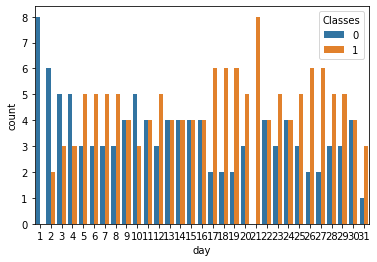

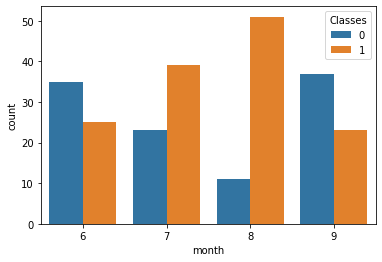

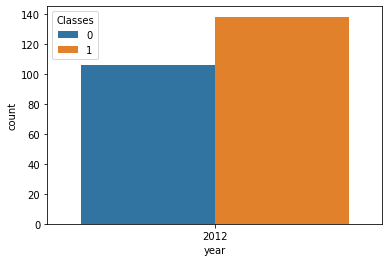

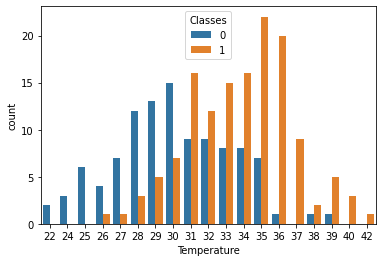

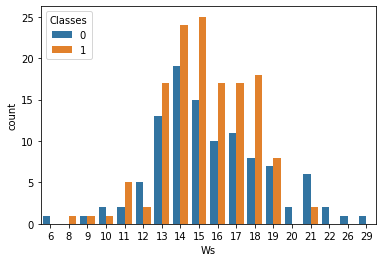

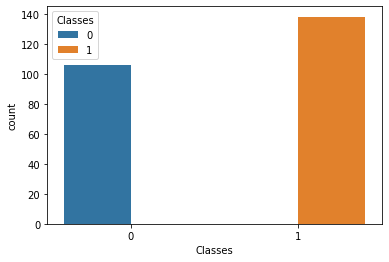

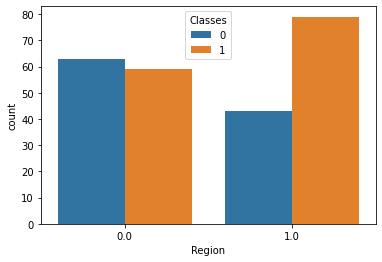

In [23]:
### this is bivariate analysis between target feature classes and discrete numerical features

for feature in discrete_features:
    sns.countplot(data=df, x=feature, hue='Classes')
    plt.show()

## Observations
1. From day vs Classes plot it is visible that on almost all days the occurance of fire is there, and its count is more than or equal to the count of no fire cases.

2. From month vs Classes plot it is visible that july and august month have more cases of occurance of fire as compared to other two months of june and september where occurance of fire is less as compared to no fire
.
3. The month of august has highest no of cases of occurance of fire.
4. Overall cases of occurance of fire is more than the cases of no occurance of fire.
5. From temperature vs Classes plot it is visible that temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
6. From windspeed vs Classes plot it is visible that for wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.
7. From Region vs Class plot it is visible that in Bejaia region, the no of cases of occurance of fire is less compared to no fire.
8. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire. Also Overall no of cases of occurance of fire is more
in Sidi Bel-abbes region as compared to Bejaia region.

## Continuous Numerical Features

In [24]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


## Distribution of Continuous Numerical Features

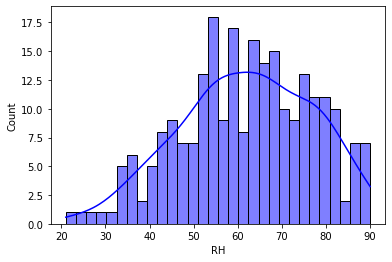

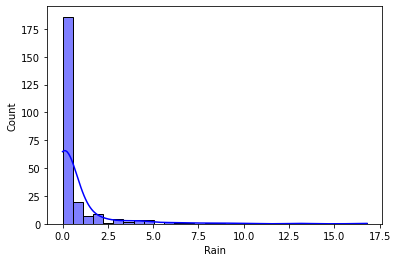

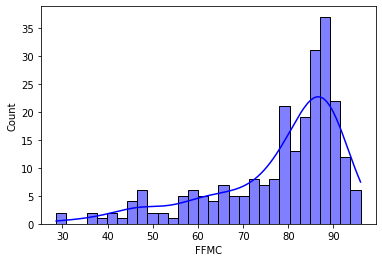

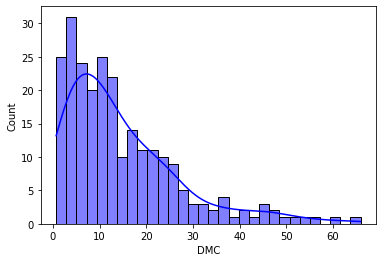

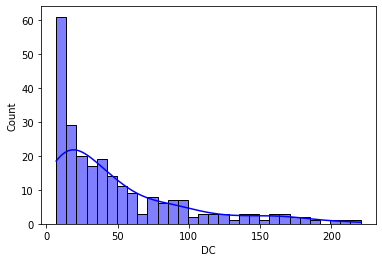

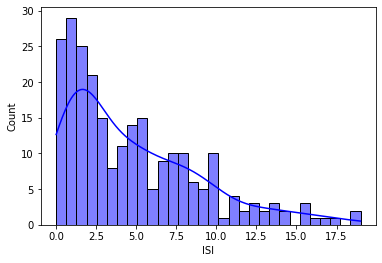

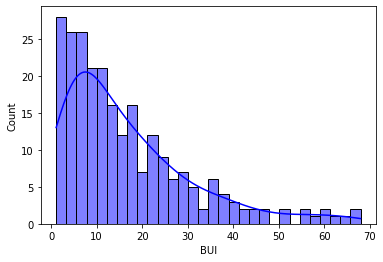

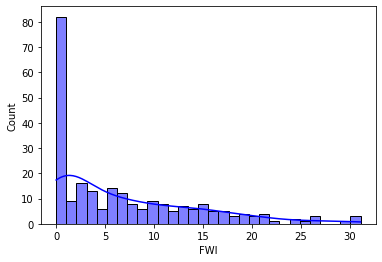

In [25]:
for feature in continuous_features:
    sns.histplot(data=df,x=feature,kde=True,bins=30,color='blue')
    plt.show()

### Observations
1. Relative humidity is following gaussian distribution 
2.Rain,DMC,DC,ISI,BUI,FWI are following right skewed distribution(Log-Normal distribution) 
3.FFMC feature follows left skewed distribution

# Checking for outliers

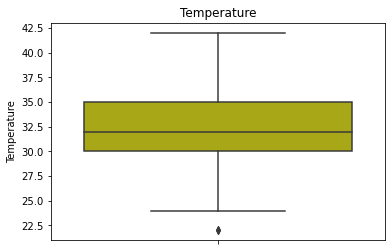

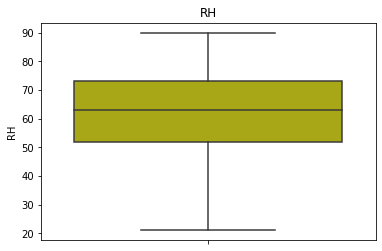

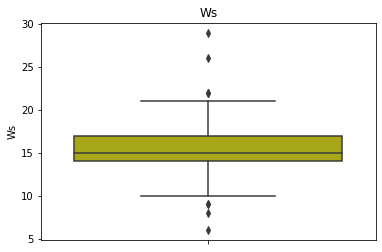

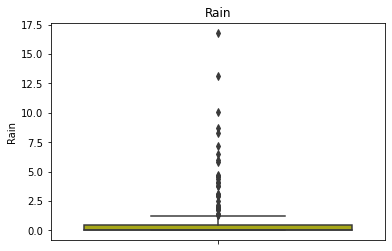

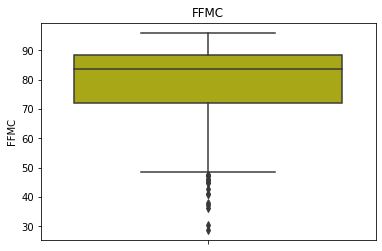

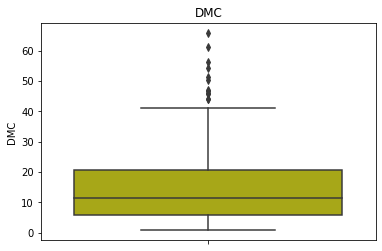

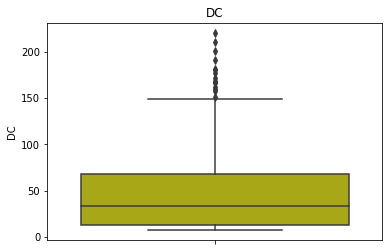

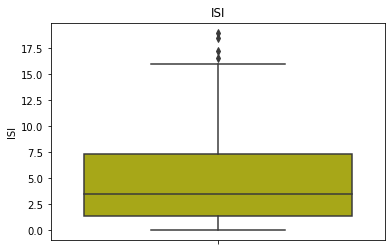

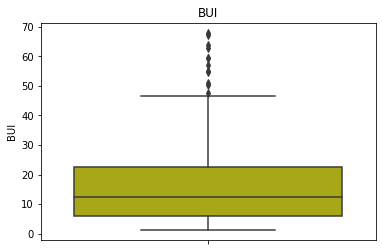

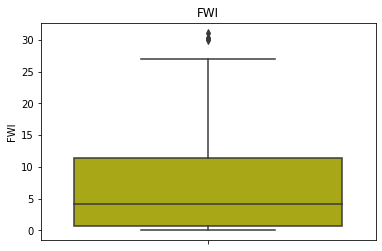

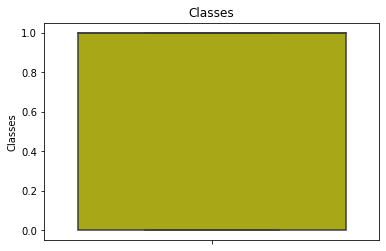

In [26]:
### excluding 'day','month','year','Region'

for feature in [feature for feature in numerical_features if feature not in ['day','month','year','Region']]:
    sns.boxplot(data=df,y=feature,color='y')
    plt.title(feature)
    plt.show();

## Observations

1.Relative Humidity RH feature doesnt have outliers.
2.Temperature and FFMC have outliers in low boundary side.
3.Wind Speed, Ws has outliers on both sides(Upper and lower boundary).
4.Rain,DMC,ISI,BUI and FWI have outliers in upper boundary side.

### Correlation between each Numerical features

In [27]:
data = round(df[[feature for feature in numerical_features if feature not in ['day','month','year','Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00,0.71


### Heatmap to visualise the Correlation

<AxesSubplot:>

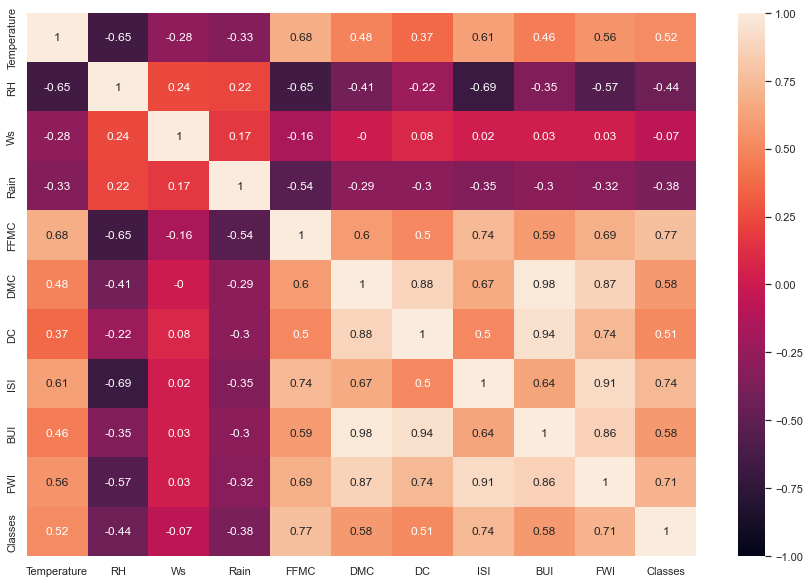

In [28]:
### Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data,annot=True, vmin=-1, vmax=1)

## Note(For both positive and negative side)
1. Correlation coefficients between 0.9 and 1.0,very highly correlated.
2. Correlation coefficients between 0.7 and 0.9, highly correlated.
3. Correlation coefficients between 0.5 and 0.7, moderately correlated.
4. Correlation coefficients between 0.3 and 0.5, low correlation.
5. Correlation coefficients less than 0.3, little correlation.

##  Observations 
1. Very highly Corrleated feature:DMC-BUI,DC-BUI,ISI-FWI
2. Highly correlated features:FFMC-ISI,DC-DMC,FWI-DMC,FWI-DC,FWI-BUI
Note: Features with very hihg and high correlation are more linearly dependent and hence have almost the same effect on the dependent
variable. So, we can drop one of the two features.

### Feature VS target

### day

<AxesSubplot:xlabel='day', ylabel='Temperature'>

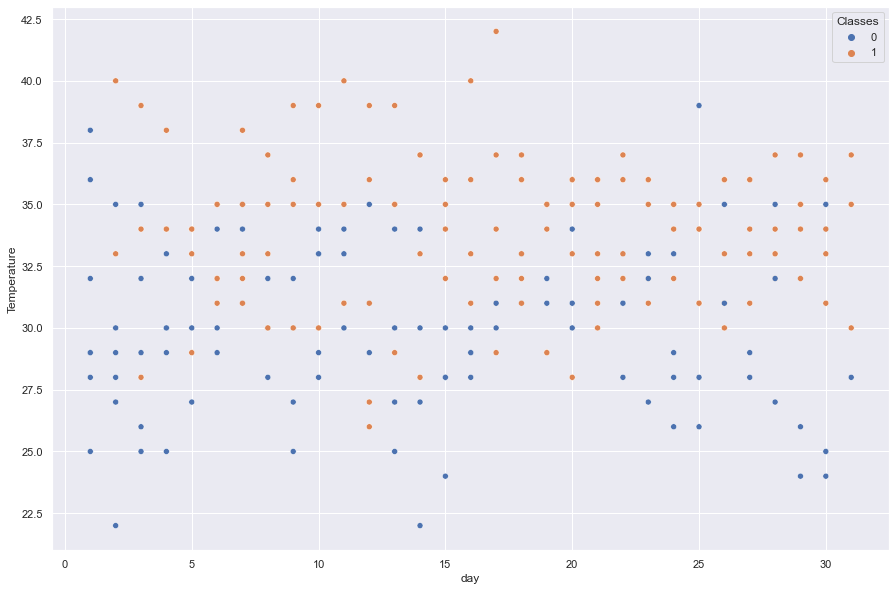

In [29]:
sns.scatterplot(data=df,x='day',y='Temperature',hue='Classes')

### Observation
1. Most cases of fire occur for temperature more than 30 degree celicus

In [30]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


### Month

<AxesSubplot:xlabel='month', ylabel='Temperature'>

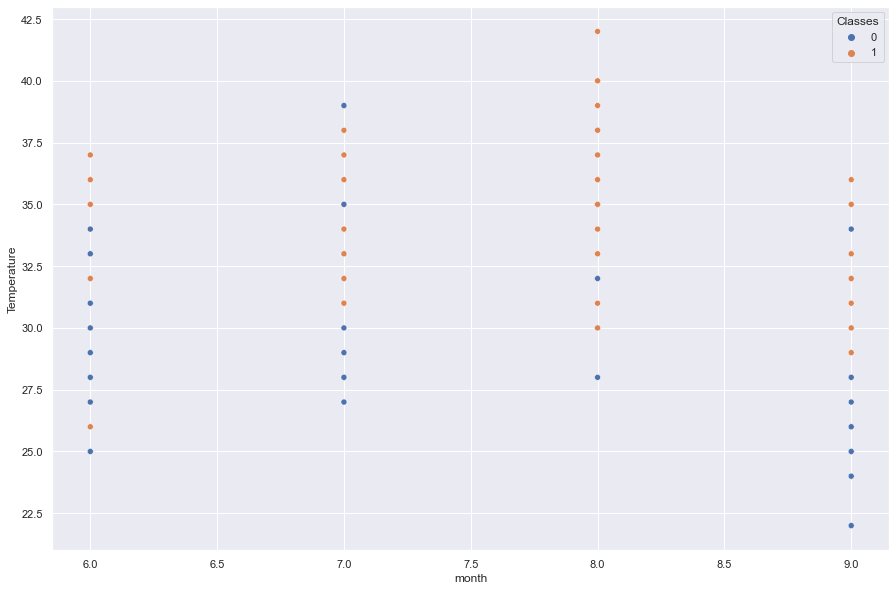

In [31]:
sns.scatterplot(data=df,x='month',y='Temperature',hue='Classes')

## Observations
1. July and august have more cases of fire as compared to no fire.
2. june and september have more cases of no fire as compared to fire.

#### Region

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

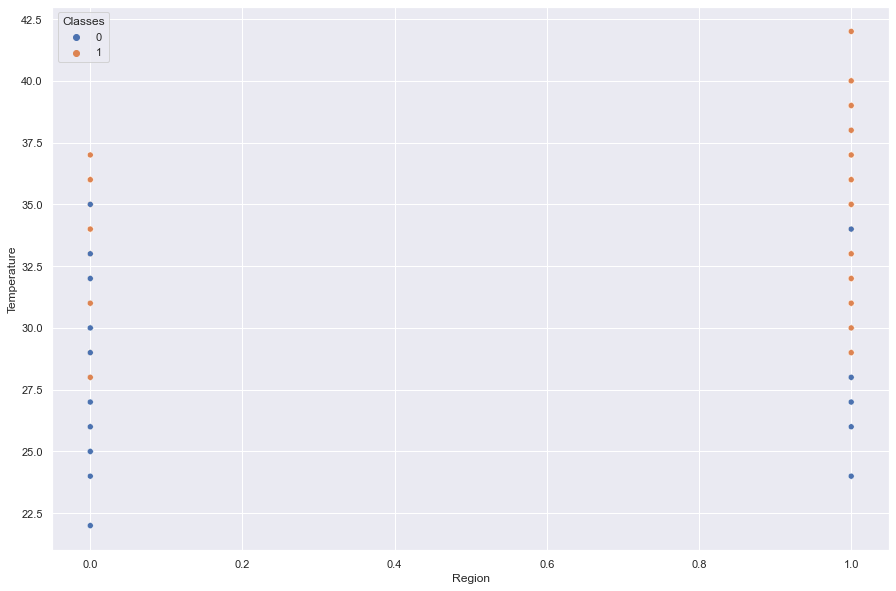

In [32]:
sns.scatterplot(data=df,x='Region',y='Temperature',hue='Classes')

## Observations
1.  In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
2. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
3. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

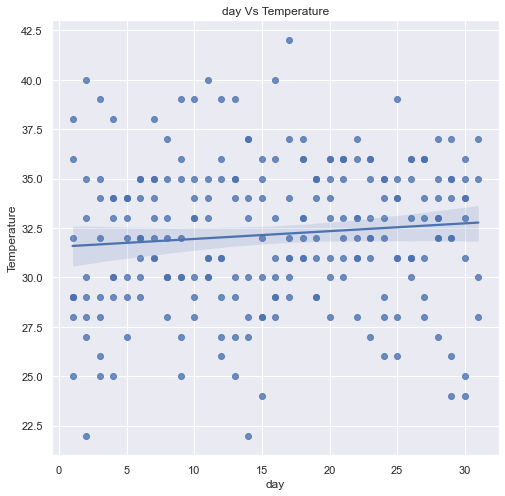

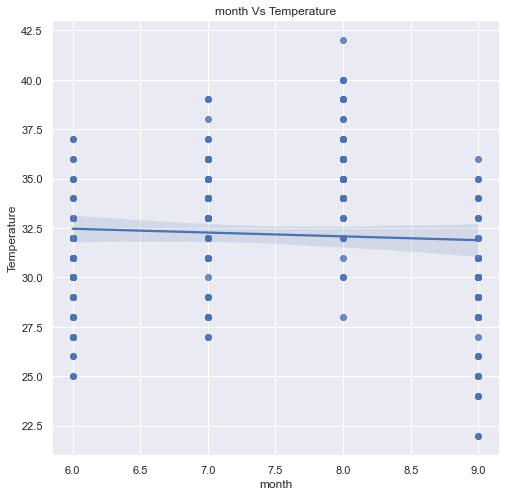

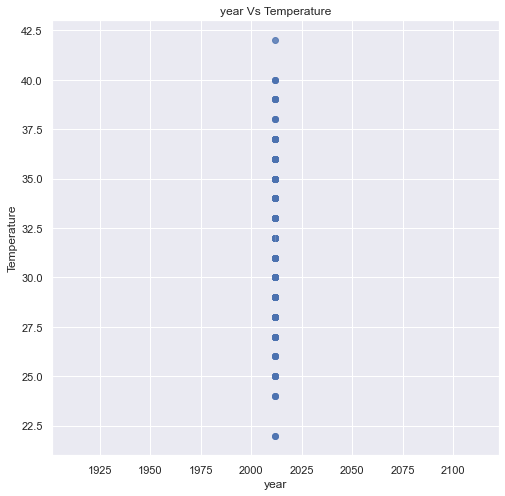

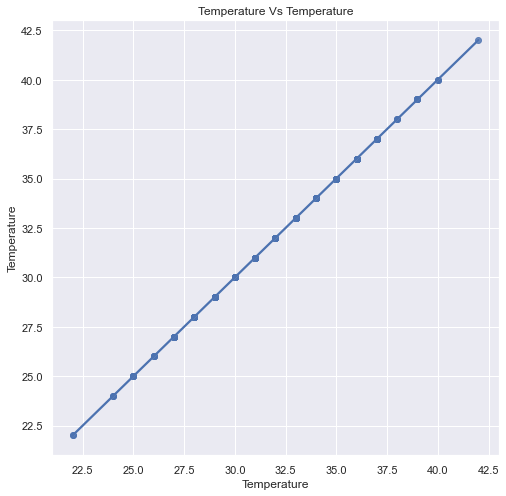

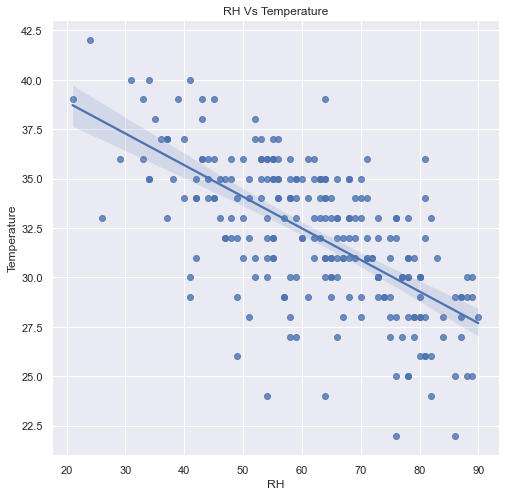

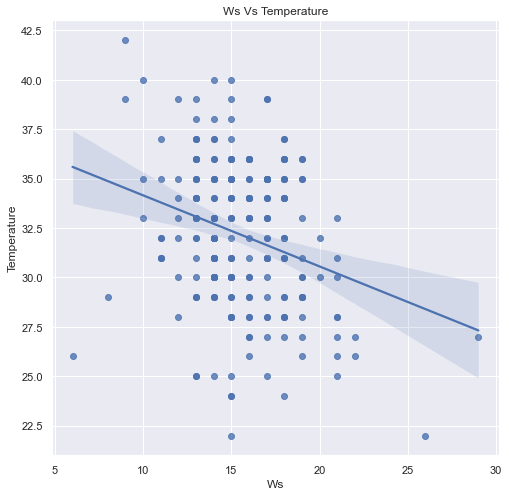

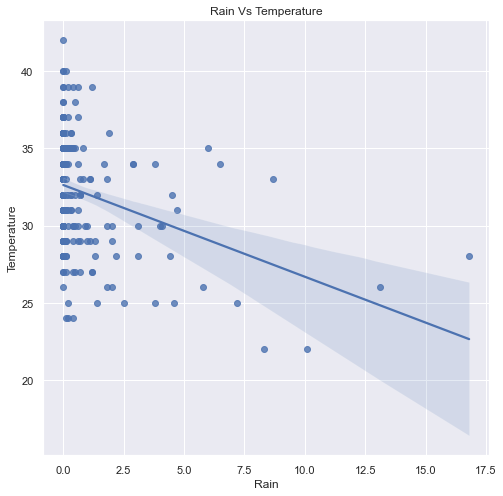

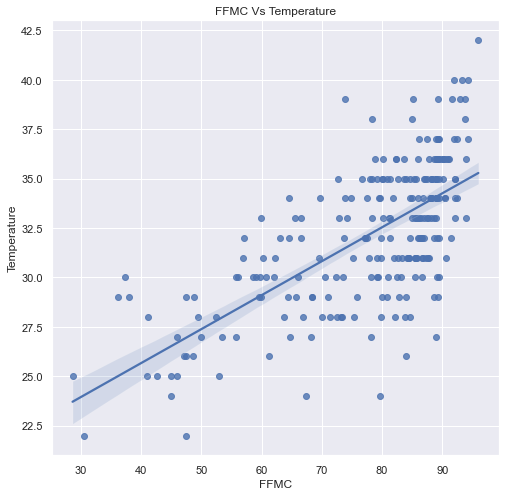

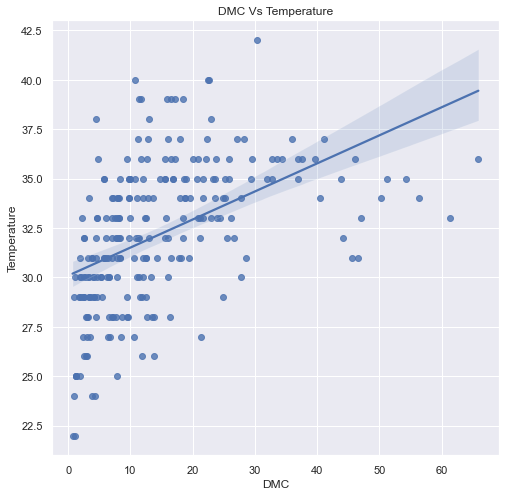

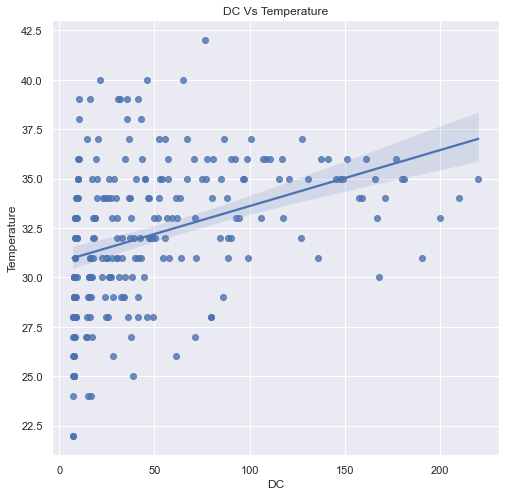

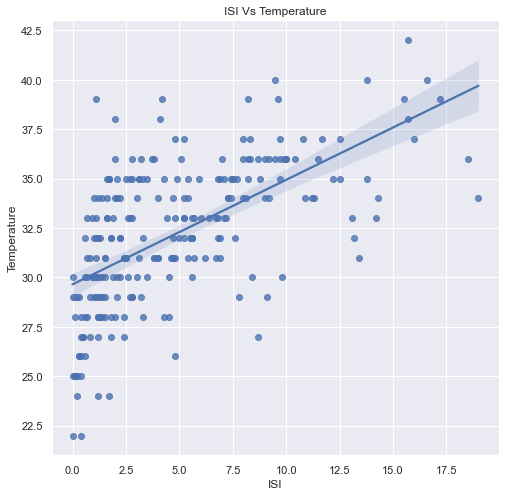

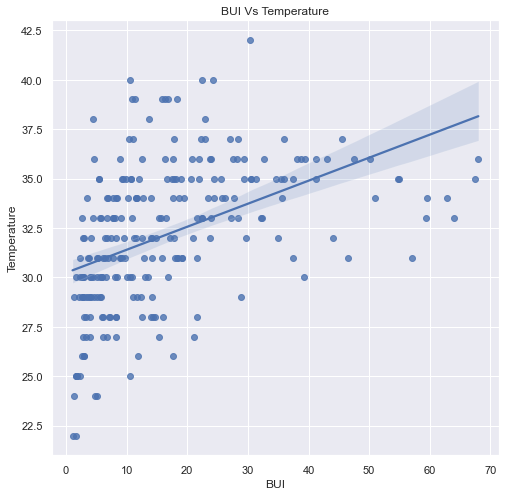

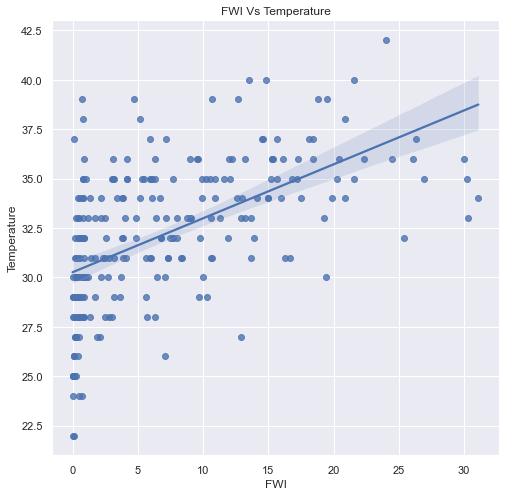

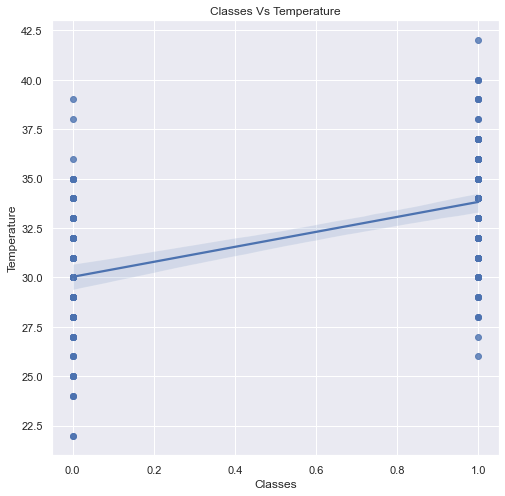

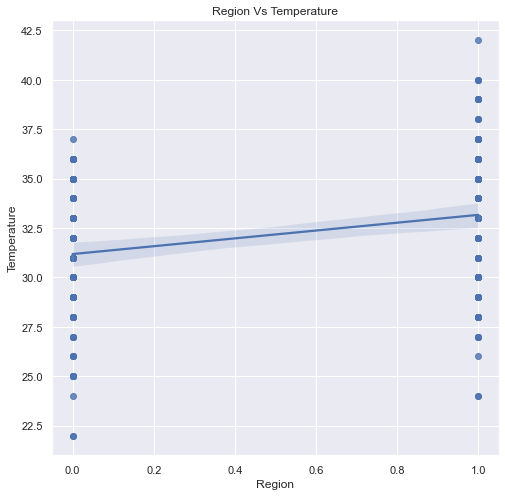

In [33]:
#### shaded region is basically with respect to ridge and lasso (lambda)
for feature in [feature for feature in df.columns if feature not in ['Temp']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=df[feature], y=df['Temperature'])
    plt.xlabel(feature)
    plt.ylabel('Temperature')
    plt.title('{} Vs Temperature'.format(feature))
    plt.show();

### Final Report

1. very highly correlated features:DMC-BUI,ISI-FWI
2. Highly correlated features:FFMC-ISI,DC-DMC,FWI-DMC,FWI-DC,FWI-BUI
3. Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.
4. Wind speed between 13 to 19Km/hr range there is most no of occurance of fire.
5. Almost all cases of occurance of fires is for region having rain less than 1mm i.e, dry regions are more prone to forest fires.
6. For FFMC(Fine Fuel Moisture Code) greater that 80, almost all cases of fire is reported.
7. DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.
8. In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.
9. In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.
10. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.
11. Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.
12. July and august have more cases of fire as compared to no fire.
13. June and september have more cases of no fire as compared to fire.
14. Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.
15. There is no null vales in dataset.
**Note** EDA and basic feature engineering is done its time to seperate independent and dependent features.
1. For demonstrating linear regression taking Temperature as Dependent feature.
2. dropping year feature as dataset contains only 2012 year

In [34]:
df.drop('year',axis=1,inplace=True)

In [35]:
df['Temp']=df['Temperature']

In [36]:
df.drop('Temperature',axis=1,inplace=True)

In [37]:
df

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Temp
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,29
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,29
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,26
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,25
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0,30
240,27,9,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0,28
241,28,9,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0,27
242,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0,24


## Starting Model Building Preparatin

In [38]:
### Getting Independent features in dataset and Dependent feature in Series object

In [39]:
df.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Temp
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,29
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,29
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,26
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,25
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,27


In [40]:
### X independent features and y dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [41]:
X.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [42]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temp, dtype: int64

### Splitting data into Training and Test data

In [43]:
## Splitting data into Training and Test da
from sklearn.model_selection import train_test_split

In [44]:
### random state train test split will be same with all people using random state =42
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [45]:
X_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,23,9,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0.0
65,5,8,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,1,0.0
132,11,6,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1,1.0
207,25,8,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1,1.0
162,11,7,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1.0


In [46]:
y_train.head()

114    32
65     34
132    31
207    34
162    34
Name: Temp, dtype: int64

In [47]:
X_test.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,25,6,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1,0.0
6,7,6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0.0
153,2,7,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1,1.0
211,29,8,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1,1.0
198,16,8,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1,1.0


In [48]:
y_test.head()

24     31
6      33
153    33
211    35
198    40
Name: Temp, dtype: int64

In [49]:
### both will have same shape
X_train.shape,y_train.shape

((163, 13), (163,))

In [50]:
### both will have same shape
X_test.shape,y_test.shape

((81, 13), (81,))

### Feature Engineering

### Standardisation/feature scaling the dataset

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
### creating a StandardScalar object
scaler = StandardScaler()
scaler

StandardScaler()

In [53]:
### Using fit_transform to standardise train data
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.84447703,  1.3826723 , -0.60257784, ..., -0.8196431 ,
        -1.04390785, -0.99388373],
       [-1.19310159,  0.48116996,  0.14460201, ..., -0.08219052,
         0.95793896, -0.99388373],
       [-0.51390872, -1.32183472, -1.41768313, ...,  1.36540157,
         0.95793896,  1.0061539 ],
       ...,
       [-1.64589683,  1.3826723 ,  0.89178186, ..., -0.90158227,
        -1.04390785, -0.99388373],
       [ 1.41047108, -0.42033238, -0.39880152, ...,  0.31384882,
         0.95793896,  1.0061539 ],
       [-0.51390872,  1.3826723 ,  0.9597073 , ..., -0.87426921,
        -1.04390785, -0.99388373]])

In [54]:
### Here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)
X_test=scaler.transform(X_test)
X_test

array([[ 1.07087465, -1.32183472,  0.07667657, ...,  0.23190965,
         0.95793896, -0.99388373],
       [-0.96670396, -1.32183472, -0.60257784, ...,  0.0680313 ,
         0.95793896, -0.99388373],
       [-1.53269802, -0.42033238, -1.01013048, ..., -0.04122093,
         0.95793896,  1.0061539 ],
       ...,
       [ 1.29727227, -0.42033238, -1.01013048, ...,  1.17421016,
         0.95793896, -0.99388373],
       [-1.3063004 , -1.32183472,  0.07667657, ..., -0.77867351,
        -1.04390785,  1.0061539 ],
       [ 1.29727227, -1.32183472, -0.5346524 , ...,  0.7235447 ,
         0.95793896,  1.0061539 ]])

### Model Buliding 

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
### creating Linear regression model
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [57]:
### passing training data(X and y ) to the model
linear_reg.fit(X_train,y_train)

LinearRegression()

In [58]:
## Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(linear_reg.coef_))
print("2. Intercept of best fit hyperplane is {}".format(linear_reg.intercept_))

1. Co-efficients of independent features is [-0.62994684 -0.33080692 -0.9681523  -0.55769053  0.23645285  1.90585623
  0.93380592  1.17296981  0.044581   -1.35995788  0.19772494 -0.25230922
  0.08345626]
2. Intercept of best fit hyperplane is 31.98159509202454


### Using model to get predictions of test data

In [59]:
linear_reg_pred = linear_reg.predict(X_test)
linear_reg_pred

array([32.86982262, 34.97907511, 34.71895423, 32.93220734, 36.64866482,
       32.00281859, 35.27819508, 28.49312857, 31.84450923, 29.27704091,
       29.06704133, 33.07364481, 32.4667427 , 32.7008168 , 34.32599535,
       31.80453584, 37.01042617, 25.23211237, 32.73196597, 33.38253854,
       31.55571716, 28.30699286, 34.23615097, 29.30603632, 36.93126913,
       24.98756128, 33.51228222, 33.57587507, 33.35705604, 35.40329932,
       33.767112  , 31.85221582, 32.40507656, 33.11736397, 32.44972087,
       31.46599605, 30.34784931, 34.2239929 , 32.37589956, 21.74277219,
       33.82900884, 34.85103093, 31.20651563, 24.69868309, 36.17424894,
       32.81796744, 31.22635993, 30.67357508, 35.1950892 , 34.29311524,
       36.98975313, 30.97884914, 30.95678802, 34.6655222 , 33.46814569,
       32.38222097, 36.65227179, 30.589826  , 30.97603618, 36.10290928,
       33.94615809, 28.43783118, 33.17776773, 31.78923636, 31.99593987,
       24.12810241, 33.39123143, 29.76320324, 36.80847578, 34.30

### Validating model using assumptions of Linear regression

## Linear relatioship

1. Test truth data and Predicted data should follow linear relationship.
2. This is an indication of a good model.

Text(0, 0.5, 'Predicted data')

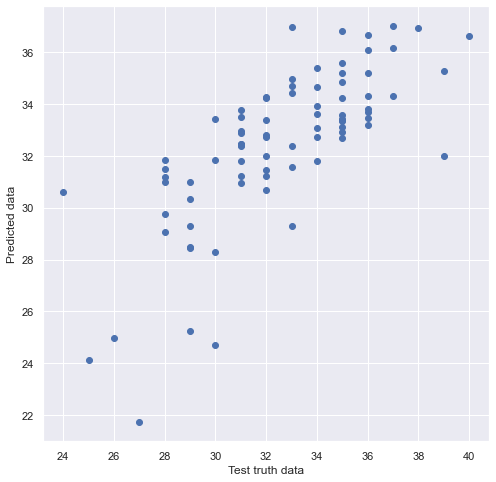

In [60]:
plt.scatter(x = y_test, y = linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### Residual distribution

1. Residuals should follow normal distribution.
2. if residuals follow normal distribution,it indicates we have a good model.

In [61]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg.head()

24    -1.869823
6     -1.979075
153   -1.718954
211    2.067793
198    3.351335
Name: Temp, dtype: float64

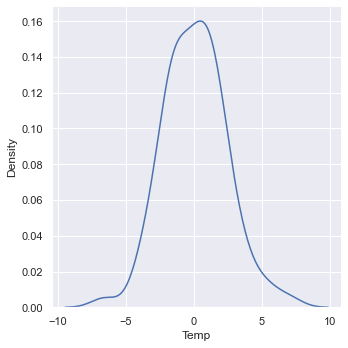

In [62]:
sns.displot(x=residual_linear_reg, kind='kde')

### Uniform distribution

1. Residuals vs Predictions should follow a uniform distribution.
2. If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

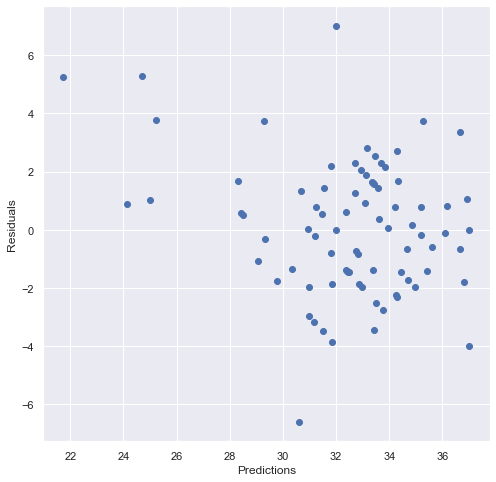

In [63]:
plt.scatter(x=linear_reg_pred,y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### Performance Matrix

### Cost function values

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## MSE, MAE and RMSE

In [65]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test,linear_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test,linear_reg_pred),2)))
print("Root mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test,linear_reg_pred)),2)))

Mean squared error is 5.25
Mean absolute error is 1.81
Root mean squared error is 2.29


### R Square and Adjusted R Square values

In [66]:
from sklearn.metrics import r2_score

In [67]:
linear_reg_r2_score=r2_score(y_test,linear_reg_pred)
print("Our Linear regression model has {} % accuracy".format(round(linear_reg_r2_score*100,3)))

linear_reg_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {} percent".format(round(linear_reg_r2_score*100,2)))

Our Linear regression model has 51.089 % accuracy
Adjusted R square accuracy is 41.6 percent


### Ridge Regression

In [68]:
from sklearn.linear_model import Ridge

In [69]:
## Creating Ridge regression model
ridge_reg = Ridge()
ridge_reg

Ridge()

In [70]:
### Passing training data(X and y) to the model
ridge_reg.fit(X_train,y_train)

Ridge()

In [71]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("2. Intercept of best fit hyperplane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [-0.61752995 -0.3207458  -0.98218457 -0.55467826  0.21315492  1.84131702
  0.40094067  0.87094221  0.11396182 -0.48465778  0.08466793 -0.24063909
  0.09187935]
2. Intercept of best fit hyperplane is 31.98159509202454


## Using model to get predictions of test data

In [72]:
ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_pred

array([32.85982748, 34.9149207 , 34.6801255 , 32.92998132, 36.61056862,
       32.05917754, 35.25499575, 28.51988807, 31.83679288, 29.28276684,
       29.06439442, 33.15037313, 32.44677748, 32.7322483 , 34.35814975,
       31.78754571, 36.91567124, 25.31324295, 32.67492302, 33.35526777,
       31.49765658, 28.29644553, 34.22316335, 29.30830796, 36.93224783,
       25.06526261, 33.48461631, 33.57641555, 33.35387649, 35.32860357,
       33.76792408, 31.83362797, 32.37993338, 33.16010038, 32.42109455,
       31.5078178 , 30.28919718, 34.25440049, 32.3007279 , 21.86171205,
       33.83192673, 34.81983629, 31.24261825, 24.76831106, 36.10419592,
       32.77320818, 31.21807666, 30.69260083, 35.1742616 , 34.29037291,
       36.93483074, 30.9447582 , 30.97755205, 34.71719979, 33.43904851,
       32.52070875, 36.64973602, 30.62216011, 30.9696123 , 36.10416977,
       33.88939183, 28.47020463, 33.13493675, 31.7769902 , 32.00695307,
       24.17731957, 33.37004249, 29.76297127, 36.78001537, 34.44

### Validating Model using assumptions of Ridge regression

## Linear relationship

1. Test truth data and Predicted data should follow linear relationship.
2. This is an indication of a good model.

Text(0, 0.5, 'Predicted data')

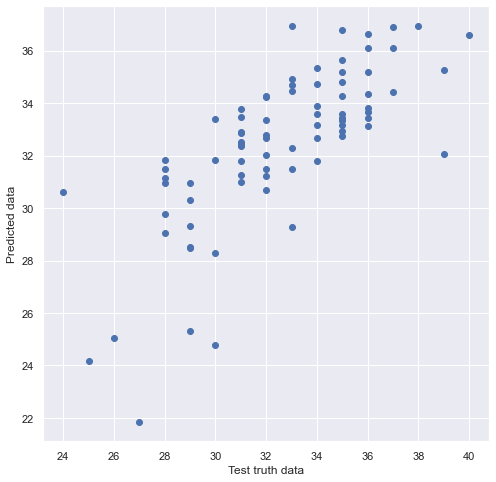

In [73]:
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

## Residual distribution

1. Residuals should follow normal distribution.
2. If residuals follow normal distribution, it indicates we have a good model.

In [74]:
residual_ridge_reg = y_test-ridge_reg_pred
residual_ridge_reg.head()

24    -1.859827
6     -1.914921
153   -1.680125
211    2.070019
198    3.389431
Name: Temp, dtype: float64

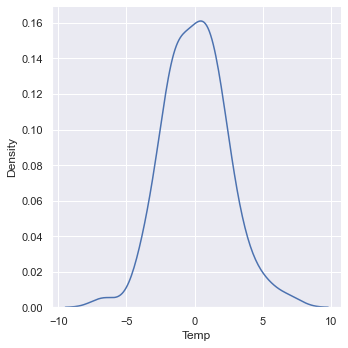

In [75]:
sns.displot(x=residual_ridge_reg, kind = 'kde')

## Uniform distribution

1. Residuals vs Predictions should follow a uniform distribution.
2. If Residuals vs Predictions follow uniform distribution , it indicates we have a good model.

Text(0, 0.5, 'Residuals')

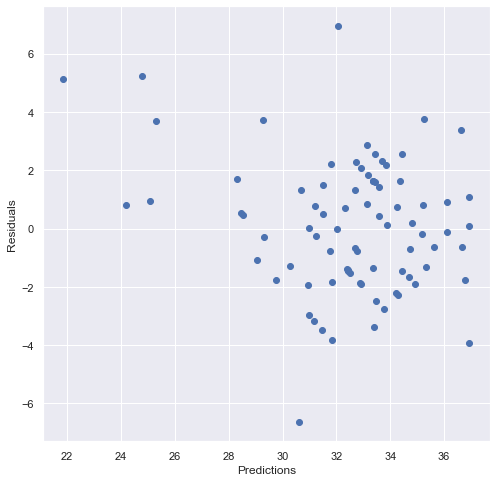

In [76]:
plt.scatter(x=ridge_reg_pred,y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## Performance Matrix

#### Cost function values

### MSE, MAE, RMSE

In [77]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test,ridge_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test,ridge_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test,ridge_reg_pred)),2)))

Mean squared error is 5.19
Mean absolute error is 1.8
Root Mean squared error is 2.28


### R Square and Adjusted R Square values

In [82]:
ridge_reg_r2_score = r2_score(y_test, ridge_reg_pred)
print("Our Ridge regression model has {} % accuracy".format(round(ridge_reg_r2_score*100,3)))
ridge_reg_adj_r2_score = 1-((1-ridge_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R squre accuracy is {} percent".format(round(ridge_reg_adj_r2_score*100,2)))

Our Ridge regression model has 51.709 % accuracy
Adjusted R squre accuracy is 42.34 percent


##  Lasso Regression

In [83]:
from sklearn.linear_model import Lasso

In [84]:
## Creating Lasso regression model
lasso_reg = Lasso()
lasso_reg

Lasso()

In [85]:
### Passing training data(X and y) to the model
lasso_reg.fit(X_train,y_train)

Lasso()

In [86]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent feautures is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyperplane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent feautures is [-0.         -0.         -0.62324302 -0.         -0.          1.25581509
  0.          0.          0.          0.          0.          0.
  0.        ]
2. Intercept of best fit hyperplane is 31.98159509202454


### Using model to get predictions of test data

In [87]:
lasso_reg_pred = lasso_reg.predict(X_test)
lasso_reg_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

### Validating model using assumptions of Lasso regression

## Linear relationship

1. Test truth data and predicted data should follow linear realtionship.
2. This is an indication of a good model.

Text(0, 0.5, 'Predicted data')

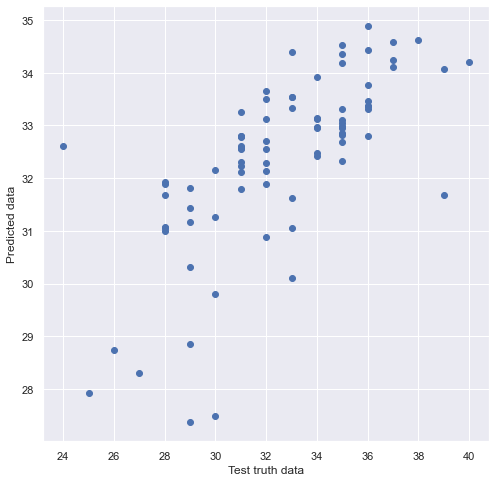

In [89]:
plt.scatter(x=y_test, y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

### Residual distribution 

1. Residuals should follow normal distribution
2. If residuals follow normal distribution,it indicates we have a good model.


In [91]:
residual_lasso_reg=y_test-lasso_reg_pred
residual_lasso_reg.head()

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
Name: Temp, dtype: float64

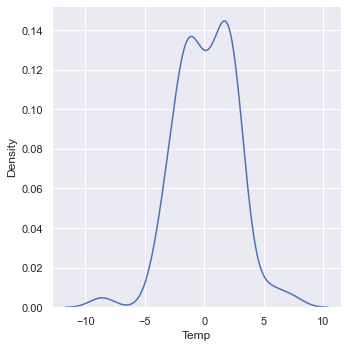

In [92]:
sns.displot(x=residual_lasso_reg, kind='kde')

## Uniform distribution

1. Residuals vs Predictions should follow a uniform distribution.
2. If Residuals vs Predictions follow uniform distribution,it indicates we have a good model.

Text(0, 0.5, 'Residuals')

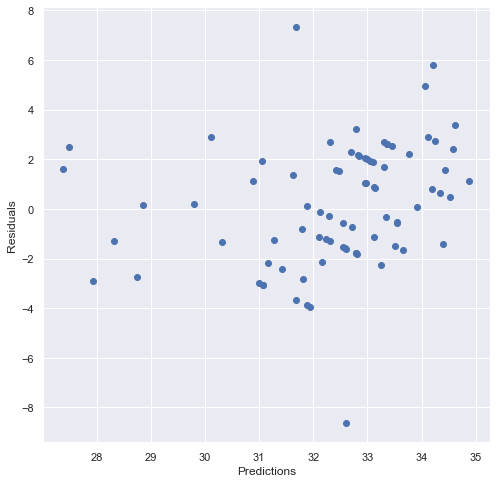

In [93]:
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

### Performance Matrix

### Cost function values

#### MSE, MAE and RMSE

In [96]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, lasso_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test, lasso_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)))

Mean squared error is 6.09
Mean absolute error is 2.0
Root Mean squared error is 2.47


### R Square and Adjusted R Square values

In [97]:
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
print("Our Lasso regression model has {} % accuracy".format(round(lasso_reg_r2_score*100,3)))
lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {}".format(round(lasso_reg_r2_score*100,2)))

Our Lasso regression model has 43.342 % accuracy
Adjusted R square accuracy is 43.34


### Elastic-Net Regression

In [98]:
from sklearn.linear_model import ElasticNet

In [99]:
## creating Elastic-Net regression model
elastic_reg = ElasticNet()
elastic_reg

ElasticNet()

In [100]:
### Passing training data(X and y) to the model
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [101]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.coef_))
print("2. Intercept of best fit hyperplane is {}".format(elastic_reg.intercept_))

1. Co-efficients of independent features is [-0.         -0.         -0.68808933 -0.10544712 -0.00834786  0.85162206
  0.10376148  0.          0.23158765  0.02547021  0.15362153  0.07372069
  0.        ]
2. Intercept of best fit hyperplane is 31.98159509202454


### Using model to get predictions of test data

In [102]:
elastic_reg_pred=elastic_reg.predict(X_test)
elastic_reg_pred

array([32.70014869, 33.29910099, 33.41026626, 32.61092932, 34.7047485 ,
       31.58360838, 34.21527053, 29.02563256, 30.73347022, 30.11039166,
       30.41277398, 32.24275851, 32.49689882, 32.11572726, 33.82943086,
       32.26602144, 35.60101706, 27.89264401, 32.12951491, 32.95265792,
       31.02735367, 29.65251053, 33.71392821, 30.09882338, 35.36763797,
       28.87850096, 32.39310489, 32.86323328, 32.70140428, 34.17896096,
       33.34379291, 31.19918174, 32.72501691, 33.05000354, 32.11073799,
       32.39596102, 30.82655691, 33.29618332, 31.03905163, 27.97071052,
       32.81078878, 32.83085009, 32.18944481, 27.83881794, 34.71347157,
       32.40467835, 31.69547324, 30.73847724, 34.32027173, 33.61283179,
       35.5799204 , 31.38989764, 31.57088417, 33.58592157, 33.61999323,
       32.2560815 , 36.04767586, 32.00594323, 30.83622131, 34.89715148,
       33.0854042 , 30.78738109, 33.49083492, 31.9555529 , 31.71431021,
       27.98432489, 32.99835463, 31.35802614, 35.34742765, 34.15

### Validating model using assumptions of Elastic-Net regression

### Linear relationship

1. Test truth data and Predicted data should follow linear relationship.
2. this is an indication of a good model.

Text(0, 0.5, 'Predicted data')

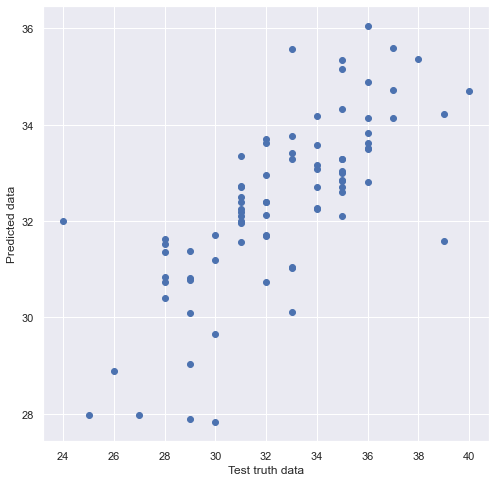

In [103]:
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

## Residual distribution

1. Residuals should follow normal distribution.
2. if residuals follow normal distribution, it indicates we have a good model.

In [105]:
residual_elastic_reg = y_test-elastic_reg_pred
residual_elastic_reg.head()

24    -1.700149
6     -0.299101
153   -0.410266
211    2.389071
198    5.295251
Name: Temp, dtype: float64

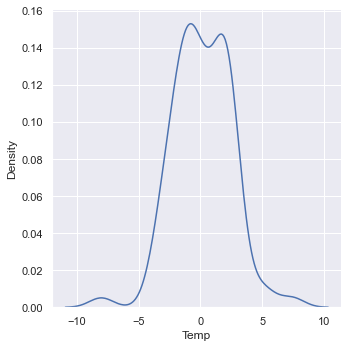

In [106]:
sns.displot(x=residual_elastic_reg, kind='kde')

## Uniform distribution

1. Residuals vs Predictions should follow a uniform distribution.
2. If Residuals vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residuals')

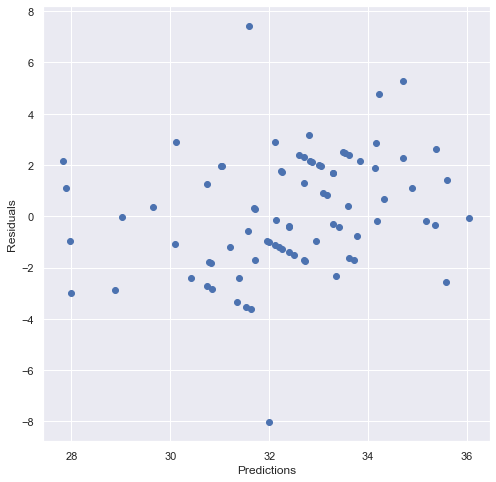

In [107]:
plt.scatter(x=elastic_reg_pred, y = residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

## Performance Matrix

### Cost function values

### MSE, MAE and RMSE

In [108]:
print("Mean squared error is {}".format(round(mean_squared_error(y_test, elastic_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(y_test,elastic_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(y_test,elastic_reg_pred)),2)))

Mean squared error is 5.39
Mean absolute error is 1.85
Root Mean squared error is 2.32


### R Square and Adjusted R Square values

In [109]:
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
print("Our Elatic-Net regression model has {} % accuracy".format(round(elastic_reg_r2_score*100,3)))
elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R square accuracy is {} %".format(round(elastic_reg_adj_r2_score*100,2)))

Our Elatic-Net regression model has 49.812 % accuracy
Adjusted R square accuracy is 40.07 %


### Comparisions of all Models

## MSE

In [148]:
print("MSE for Linear Regression Model is '{}'\nMSE for Ridge Regression Model is '{}'\nMSE for Lasso Regression Model is '{}'\nMSE for Elastic-Net Regression Model is"
.format(round(mean_squared_error(y_test, linear_reg_pred),2), round(mean_squared_error(y_test, ridge_reg_pred),2),
 round(mean_squared_error(y_test, lasso_reg_pred),2), round(mean_squared_error(y_test, elastic_reg_pred),2)))

MSE for Linear Regression Model is '5.25'
MSE for Ridge Regression Model is '5.19'
MSE for Lasso Regression Model is '6.09'
MSE for Elastic-Net Regression Model is


In [146]:
print("MAE for Linear Regression Model is '{}'\nMAE for Ridge Regression Model is '{}'\nMAE for Lasso Regression Model is '{}'\n"
.format(round(mean_absolute_error(y_test, linear_reg_pred),2), round(mean_absolute_error(y_test, ridge_reg_pred),2),
round(mean_absolute_error(y_test, lasso_reg_pred),2), round(mean_absolute_error(y_test, elastic_reg_pred),2)))

MAE for Linear Regression Model is '1.81'
MAE for Ridge Regression Model is '1.8'
MAE for Lasso Regression Model is '2.0'

